In [26]:
#knn process
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [42]:
# Read dataset to pandas dataframe
dataset = pd.read_excel('knndata.xlsx')
dataset

,umur,berat,tinggi,lika,status _gizi
0,42,14.9,99.3,50.0,baik
1,37,13.6,92.3,48.0,baik
2,30,14.4,90.5,49.0,baik
3,29,11.5,83.8,47.5,baik
4,18,7.7,75.1,45.0,BGM
...,...,...,...,...,...
377,26,12.0,96.6,49.0,baik
378,3,5.0,55.0,40.0,baik
379,2,4.5,55.0,38.0,baik
380,6,7.4,69.9,43.0,baik


In [59]:
#pisahkan datanya 
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values  


In [44]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [45]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(X_test) 

In [48]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 0  1  0]
 [ 0 68  1]
 [ 0  5  2]]
              precision    recall  f1-score   support

         BGM       0.00      0.00      0.00         1
        baik       0.92      0.99      0.95        69
      kurang       0.67      0.29      0.40         7

    accuracy                           0.91        77
   macro avg       0.53      0.42      0.45        77
weighted avg       0.88      0.91      0.89        77



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [49]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

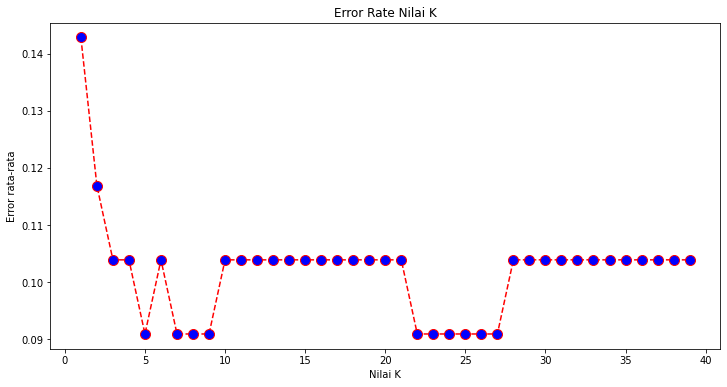

In [50]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')  

In [53]:
#bosting
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [55]:
gbc.score(X_test, y_pred)

0.9090909090909091